In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from skimage.io import imread

image = imread('../dataset/images/CAKE.jpg')
type(image)

numpy.ndarray

(151, 198, 3) uint8 0 255


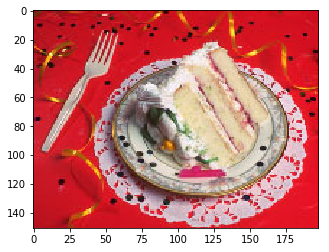

In [3]:
print(image.shape, image.dtype, image.min(), image.max())
plt.imshow(image);


In [4]:
print(np.product(image.shape))
print(image.nbytes)

89694
89694


In [5]:
print("image size: {:0.3} MB".format(image.nbytes / 1e6))


image size: 0.0897 MB


In [6]:

red_channel = image[:, :, 0]
red_channel

array([[163, 152, 137, ..., 204, 204, 204],
       [139, 132, 123, ..., 204, 204, 204],
       [120, 116, 113, ..., 204, 204, 204],
       ...,
       [179, 179, 179, ..., 227, 227, 227],
       [177, 178, 179, ..., 227, 227, 227],
       [179, 179, 180, ..., 227, 227, 227]], dtype=uint8)

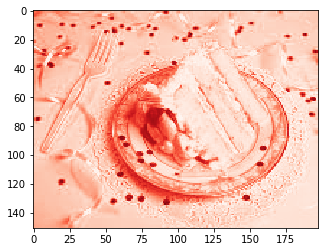

In [7]:
plt.imshow(image[:, :, 0], cmap=plt.cm.Reds_r);


In [8]:

from skimage.transform import resize

image = imread('../dataset/images/CAKE.jpg')
lowres_image = resize(image, (50, 50), mode='reflect', anti_aliasing=True)
lowres_image.shape

(50, 50, 3)

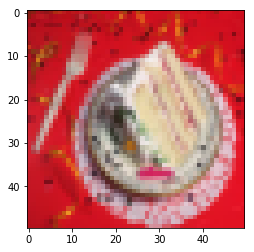

In [9]:
plt.imshow(lowres_image)

In [10]:
print("image size: {:0.3} MB".format(lowres_image.nbytes / 1e6))


image size: 0.06 MB


In [11]:
lowres_large_range_image = resize(image, (50, 50), mode='reflect',
                                  anti_aliasing=True, preserve_range=True)

In [12]:
print(lowres_large_range_image.shape, lowres_large_range_image.dtype, lowres_large_range_image.min(), lowres_large_range_image.max())


(50, 50, 3) float64 10.400000000000091 243.54999999999995


In [13]:
from keras.applications.resnet50 import preprocess_input, ResNet50

model = ResNet50(weights='imagenet')

Using TensorFlow backend.


In [14]:
import keras.backend as K

K.image_data_format()

'channels_last'

In [15]:
model.input_shape

(None, 224, 224, 3)

In [16]:
image = imread('../dataset/images/CAKE.jpg')
image_224 = resize(image, (224, 224), preserve_range=True, mode='reflect')

C:\ProgramData\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [17]:
print(image_224.dtype, image_224.shape)

float64 (224, 224, 3)


In [18]:
image_224 = image_224.astype(np.float32)
image_224.dtype

dtype('float32')

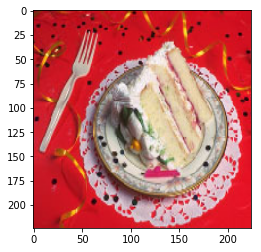

In [19]:
plt.imshow(image_224 / 255);

In [20]:
model.input_shape

(None, 224, 224, 3)

In [21]:
image_224.shape

(224, 224, 3)

In [22]:

image_224_batch = np.expand_dims(image_224, axis=0)
# Or image_224_batch = image_224[None, ...] if you are familiar with broadcasting in numpy
image_224_batch.shape

(1, 224, 224, 3)

In [23]:
%%time
x = preprocess_input(image_224_batch.copy())
preds = model.predict(x)

Wall time: 1.23 s


In [24]:
type(preds)

numpy.ndarray

In [25]:
print(preds.dtype, preds.shape)


float32 (1, 1000)


In [26]:
preds.sum(axis=1)

array([0.9999999], dtype=float32)

In [27]:
from keras.applications.resnet50 import decode_predictions

decode_predictions(preds, top=5)

[[('n07579787', 'plate', 0.22616011),
  ('n04476259', 'tray', 0.109472096),
  ('n04332243', 'strainer', 0.072464295),
  ('n07745940', 'strawberry', 0.06420348),
  ('n07871810', 'meat_loaf', 0.055371195)]]

In [28]:
print('Predicted image labels:')
class_names, confidences = [], []
for class_id, class_name, confidence in decode_predictions(preds, top=5)[0]:
    print("    {} (synset: {}): {:0.3f}".format(class_name, class_id, confidence))

Predicted image labels:
    plate (synset: n07579787): 0.226
    tray (synset: n04476259): 0.109
    strainer (synset: n04332243): 0.072
    strawberry (synset: n07745940): 0.064
    meat_loaf (synset: n07871810): 0.055
